<a href="https://colab.research.google.com/github/Dewak20/Dibimbing/blob/main/Dewa_Krishnadana__explanatory_model_analysis__fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install & Load Package

In [161]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install dalex
!pip install shap
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [163]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt
# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 
# load eli5
import eli5

##Load Dataset

In [164]:
# Load car_insurance_fraud_dataset
df = pd.read_csv('/content/drive/MyDrive/DIBIMBING/Fraud.csv')

#Preprocessing Data

In [165]:
# Merubah tampilan agar lebih mudah melihat columns
df2 = df.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,10/17/2014,6/27/2006,9/6/2000,5/25/1990,6/6/2014,10/12/2006,6/4/2000,2/3/1990,2/5/1997,7/25/2011,...,2/5/1994,7/12/2006,10/24/2007,12/8/2001,3/24/2007,7/16/1991,1/5/2014,2/17/2003,11/18/2011,11/11/1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


In [166]:
# Membuat duplicate data
df1 = df.copy()

In [167]:
# Menghilangkan beberapa columns pada data
# Hal ini dilakukan karena ada beberapa columns yang informasinya kurang penting sehingga perlu di drop 

df1 = df1.drop(
   ['policy_number', 'policy_bind_date', 'policy_state', 
   'policy_csl', 'policy_deductable','umbrella_limit','insured_zip', 'insured_sex','insured_occupation','capital-loss',
    'insured_hobbies','insured_education_level', 'incident_date', 'authorities_contacted', 'incident_state',
    'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
    'bodily_injuries','witnesses', 'police_report_available','injury_claim', 'property_claim', 'property_damage', 
    'incident_type', 'incident_severity',
    'vehicle_claim', 'auto_model'],
   axis = 1)


In [168]:
df1

,months_as_customer,age,policy_annual_premium,insured_relationship,capital-gains,collision_type,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,1406.91,husband,53300,Side Collision,71610,Saab,2004,Y
1,228,42,1197.22,other-relative,0,?,5070,Mercedes,2007,Y
2,134,29,1413.14,own-child,35100,Rear Collision,34650,Dodge,2007,N
3,256,41,1415.74,unmarried,48900,Front Collision,63400,Chevrolet,2014,Y
4,228,44,1583.91,unmarried,66000,?,6500,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...
995,3,38,1310.80,unmarried,0,Front Collision,87200,Honda,2006,N
996,285,41,1436.79,wife,70900,Rear Collision,108480,Volkswagen,2015,N
997,130,34,1383.49,other-relative,35100,Side Collision,67500,Suburu,1996,N
998,458,62,1356.92,wife,0,Rear Collision,46980,Audi,1998,N


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   months_as_customer     1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   policy_annual_premium  1000 non-null   float64
 3   insured_relationship   1000 non-null   object 
 4   capital-gains          1000 non-null   int64  
 5   collision_type         1000 non-null   object 
 6   total_claim_amount     1000 non-null   int64  
 7   auto_make              1000 non-null   object 
 8   auto_year              1000 non-null   int64  
 9   fraud_reported         1000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 78.2+ KB


In [170]:
df1.isnull().sum()

months_as_customer       0
age                      0
policy_annual_premium    0
insured_relationship     0
capital-gains            0
collision_type           0
total_claim_amount       0
auto_make                0
auto_year                0
fraud_reported           0
dtype: int64

In [171]:
print(df1['collision_type'].unique())

['Side Collision' '?' 'Rear Collision' 'Front Collision']


Pada data diatas dapat kita lihat bahwa tidak ada data yang NUll atau NA tapi ada beberapa data yang hilang dan diganti dengan simbol " ? " tanda tanya. Columns tersebut adalah 'collision_type' dan 'property_damage'

In [172]:
print(df1[df1['collision_type']== '?'].count())

months_as_customer       178
age                      178
policy_annual_premium    178
insured_relationship     178
capital-gains            178
collision_type           178
total_claim_amount       178
auto_make                178
auto_year                178
fraud_reported           178
dtype: int64


Karena jumlahnya lumayan banyak jadi kita tidak bisa membuang semuanya, jadi perlu kita berikan treatment khusus yaitu menggunakan modus atau kategory terbanyak 

In [173]:
print(df1["collision_type"].mode())

0    Rear Collision
dtype: object


Mengganti simbol '?' menjadi 'Rear Collision' karena itu merupakan modus dari data dan juga merubah categorical data pada columns fraud menjadi numeric

In [174]:
df1['collision_type'] = df1['collision_type'].replace(['?'],'Rear Collision')
df1['fraud_reported'] = df1['fraud_reported'].replace(['Y'], 1)
df1['fraud_reported'] = df1['fraud_reported'].replace(['N'], 0)
df1

,months_as_customer,age,policy_annual_premium,insured_relationship,capital-gains,collision_type,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,1406.91,husband,53300,Side Collision,71610,Saab,2004,1
1,228,42,1197.22,other-relative,0,Rear Collision,5070,Mercedes,2007,1
2,134,29,1413.14,own-child,35100,Rear Collision,34650,Dodge,2007,0
3,256,41,1415.74,unmarried,48900,Front Collision,63400,Chevrolet,2014,1
4,228,44,1583.91,unmarried,66000,Rear Collision,6500,Accura,2009,0
...,...,...,...,...,...,...,...,...,...,...
995,3,38,1310.80,unmarried,0,Front Collision,87200,Honda,2006,0
996,285,41,1436.79,wife,70900,Rear Collision,108480,Volkswagen,2015,0
997,130,34,1383.49,other-relative,35100,Side Collision,67500,Suburu,1996,0
998,458,62,1356.92,wife,0,Rear Collision,46980,Audi,1998,0


In [175]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   months_as_customer     1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   policy_annual_premium  1000 non-null   float64
 3   insured_relationship   1000 non-null   object 
 4   capital-gains          1000 non-null   int64  
 5   collision_type         1000 non-null   object 
 6   total_claim_amount     1000 non-null   int64  
 7   auto_make              1000 non-null   object 
 8   auto_year              1000 non-null   int64  
 9   fraud_reported         1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.2+ KB


In [176]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [177]:
dummy_var1 = pd.get_dummies(df1['insured_relationship'])
dummy_var1

,husband,not-in-family,other-relative,own-child,unmarried,wife
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
995,0,0,0,0,1,0
996,0,0,0,0,0,1
997,0,0,1,0,0,0
998,0,0,0,0,0,1


In [178]:
dummy_var2 = pd.get_dummies(df1['collision_type'])
dummy_var2

,Front Collision,Rear Collision,Side Collision
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
995,1,0,0
996,0,1,0
997,0,0,1
998,0,1,0


In [179]:
dummy_var3 = pd.get_dummies(df1['auto_make'])
dummy_var3

,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,0,0,1,0,0
998,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
# bind the dummy variables into eggs_sales_data
df1 = pd.concat([df1, dummy_var1, dummy_var2, dummy_var3], axis = 1)
df1 = df1.drop(
    ['insured_relationship', 'collision_type', 'auto_make'], 
    axis = 1)
df1

,months_as_customer,age,policy_annual_premium,capital-gains,total_claim_amount,auto_year,fraud_reported,husband,not-in-family,other-relative,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,328,48,1406.91,53300,71610,2004,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,228,42,1197.22,0,5070,2007,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,134,29,1413.14,35100,34650,2007,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,256,41,1415.74,48900,63400,2014,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1583.91,66000,6500,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1310.80,0,87200,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
996,285,41,1436.79,70900,108480,2015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,130,34,1383.49,35100,67500,1996,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
998,458,62,1356.92,0,46980,1998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


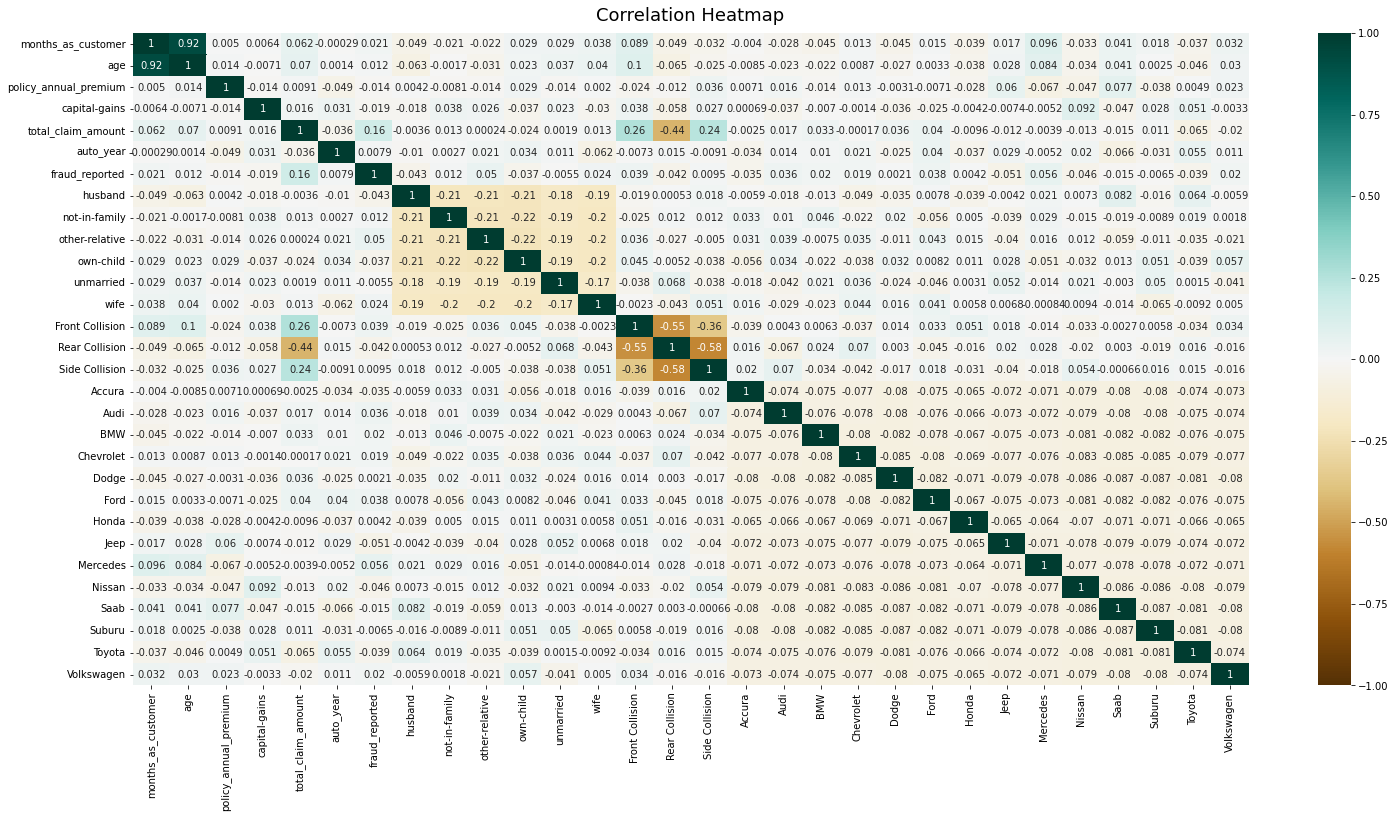

In [181]:
# check correlation matrix of churn_data
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Ada beberapa Variable predictor yang saling berkolerasi seperti yang kita lihat diatas. Beberapa diantaranya adalah rear collison dengan front collison dan juga rear collison dengan slide colison. Agar mendapatkan hasil modeling yang baik maka variabel ini akan dihilangkan atau di drop.

In [182]:
df1 = df1.drop(
   ['Rear Collision', 'Side Collision', 'Front Collision' ],
   axis = 1)


##Train-Test Split

In [183]:
# assign 'churned' column to y 
y = df1['fraud_reported'].values
# assign all columns except 'churned' to X
X = df1.drop(['fraud_reported'], axis = 1).values

In [184]:
# check y dimension
y.shape

(1000,)

In [185]:
# check X dimension
X.shape

(1000, 26)

In [186]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000,
)

In [187]:
# Check X_train_churn dimension
X_train.shape

(700, 26)

In [188]:
# check y_train_churn class distribution
np.unique(y_train, return_counts=True)[1]

array([527, 173])

In [189]:
# check X_test_churn dimension
X_test.shape

(300, 26)

In [190]:
# check y_test_churn class distribution
np.unique(y_test, return_counts=True)[1]

array([226,  74])

##Logistics Regression

Modeling using StatsModel

Logit param:

In [191]:
# define logistic regression model
logistic_reg = LogisticRegression(penalty='l2', fit_intercept=True, C=1.0, random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train.ravel())

LogisticRegression(random_state=1000)

In [192]:
# check model coefficient
logistic_reg.coef_

array([[ 3.36654713e-03, -4.28777539e-02, -6.06111477e-04,
        -3.31681872e-06,  1.83570086e-05, -1.55200440e-04,
        -2.52093685e-03,  2.34064013e-03,  4.79429939e-03,
        -4.22766739e-03, -1.98470775e-04, -1.97336519e-04,
        -2.78939674e-03,  2.26581780e-03,  3.51100033e-04,
         1.82379490e-04, -1.19096304e-03,  1.80744119e-03,
        -4.41030115e-04, -3.79765341e-03,  4.70515584e-03,
         2.50364034e-04,  2.04926499e-04,  2.30297968e-04,
        -2.42535676e-03,  6.37445211e-04]])

In [193]:
# check the intercept
logistic_reg.intercept_

array([-9.4722544e-06])

In [194]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [195]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.751678,0.0,0.746667,0.375839,0.566264
recall,0.991150,0.0,0.746667,0.495575,0.746667
f1-score,0.854962,0.0,0.746667,0.427481,0.644071
support,226.000000,74.0,0.746667,300.000000,300.000000


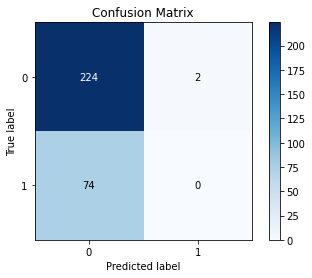

In [196]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

Dari data bisa dilihat bahwa model dapat memprediksi yang tidak fraud dengan yang fraud

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



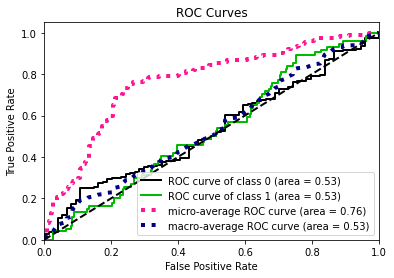

In [197]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [198]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.0

#Model Interpretation

#Weight Plot

In [199]:
var_name = df1.drop(['fraud_reported'], axis = 1).columns.tolist()

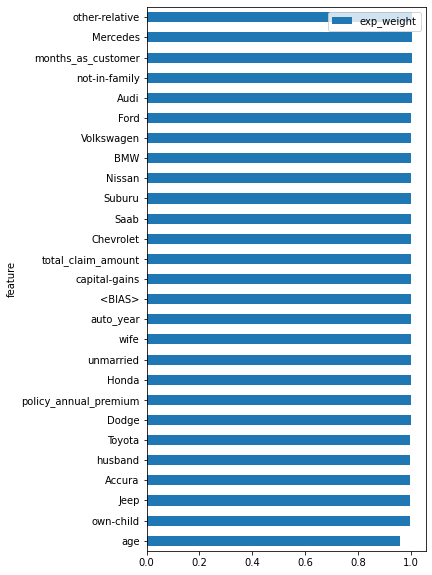

In [200]:
# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
)

##KNN MODEL

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = 4, p = 2)
# fit model to data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [203]:
# predict
pred_result1 = knn.predict(X_test)
pred_proba_result1 = knn.predict_proba(X_test)

In [204]:
from sklearn.metrics import classification_report

In [205]:
y_pred = knn.predict(X_test)

In [206]:
metrics.accuracy_score(y_test, y_pred)

0.74

In [207]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result1, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.758741,0.357143,0.74,0.557942,0.659680
recall,0.960177,0.067568,0.74,0.513872,0.740000
f1-score,0.847656,0.113636,0.74,0.480646,0.666598
support,226.000000,74.000000,0.74,300.000000,300.000000


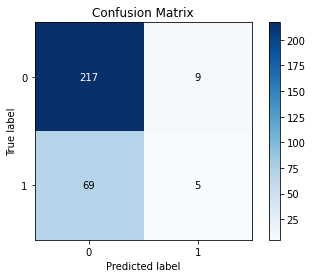

In [208]:
skplt.metrics.plot_confusion_matrix(y_test, pred_result1);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



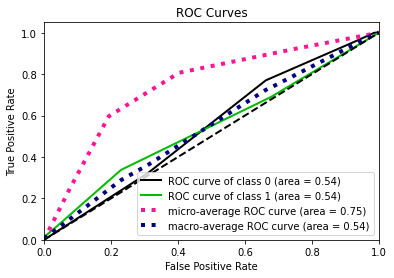

In [209]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result1);

### Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [211]:
clf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [212]:
# predict
pred_result2 = clf.predict(X_test)
pred_proba_result2 = clf.predict_proba(X_test)

In [213]:
y_pred = clf.predict(X_test)

In [214]:
metrics.accuracy_score(y_test, y_pred)

0.74

In [215]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result2, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.750000,0.0,0.74,0.375000,0.565000
recall,0.982301,0.0,0.74,0.491150,0.740000
f1-score,0.850575,0.0,0.74,0.425287,0.640766
support,226.000000,74.0,0.74,300.000000,300.000000


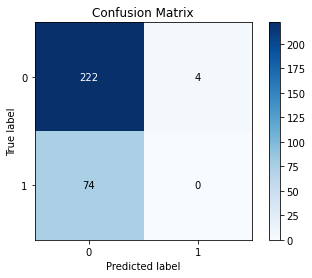

In [216]:
skplt.metrics.plot_confusion_matrix(y_test, pred_result2);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



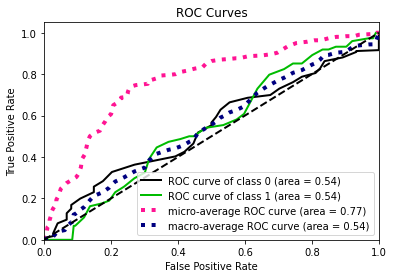

In [217]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result2);

##XGBOOST

In [218]:
# fit model no training data
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=1000)

In [219]:
# XGBoost prediction
xgb_pred3 = xgb_clf.predict(X_test)
xgb_pred_proba3 = xgb_clf.predict_proba(X_test)

In [220]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred3, target_names=['fraud','churn'], output_dict=True))

,fraud,churn,accuracy,macro avg,weighted avg
precision,0.748252,0.142857,0.72,0.445554,0.598921
recall,0.946903,0.027027,0.72,0.486965,0.720000
f1-score,0.835938,0.045455,0.72,0.440696,0.640952
support,226.000000,74.000000,0.72,300.000000,300.000000


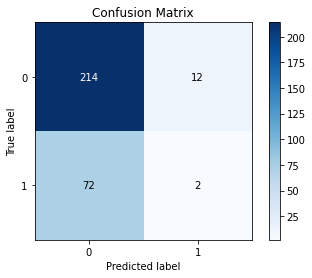

In [221]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred3);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



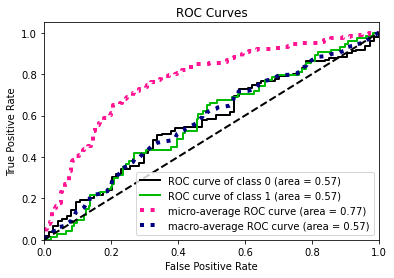

In [225]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba3);

##Model Agnostic Methods

In [226]:
# Inititate Explainer for all models

## initiate explainer for logistic regression model
fraud_rl_exp = dx.Explainer(logistic_reg, X_train, y_train, label = "LG Interpretation")

Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 700 rows 26 cols
  -> target variable   : 700 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LG Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f90ec270dd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0763, mean = 0.247, max = 0.533
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.474, mean = -1.88e-05, max = 0.896
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



##Feature Importance

In [227]:
# visualizr permutation feature importance for logistic regression Model
fraud_rl_exp.model_parts().plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature 

In [228]:
# create partial dependence plot of Random Forest model
fraud_rl_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

Calculating ceteris paribus:  12%|█▏        | 3/26 [00:00<00:00, 28.67it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but